In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
d1 = pd.read_csv("../results/results_combined_1.csv", index_col=0)
d2 = pd.read_csv("../results/results_combined_4.csv", index_col=0)

In [4]:
d1.replace("MMDAW", "MMDEW", inplace=True)
d2.replace("MMDAW", "MMDEW", inplace=True)
d1.replace("NewMA", "NEWMA", inplace=True)
d2.replace("NewMA", "NEWMA", inplace=True)

In [5]:
d1[d1["dataset"] == "Traf"].actual_cps.unique()

array(['[43, 90]', '[47, 90]', '[43, 88]', '[45, 92]', '[47, 92]'],
      dtype=object)

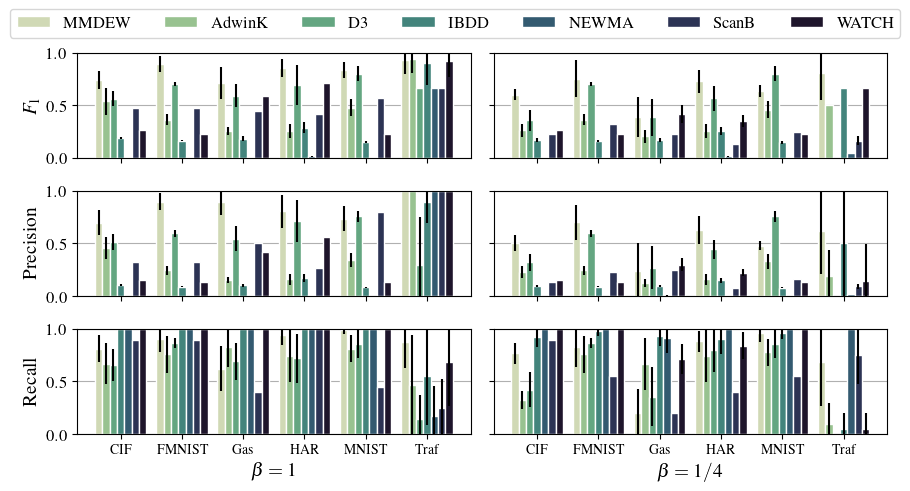

In [8]:
fig, ((ax11,ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3,2,figsize=(9,4.7),sharex=True,sharey=True)

def p(data,y,ax):
    bar_width = .12 #.18
    group_idx = np.arange(6) # number of datasets
    algorithms = ["MMDEW", "AdwinK", "D3", "IBDD", "NEWMA", "ScanB", "WATCH"]
    cs = sns.cubehelix_palette(7, start=0.5, rot=-.75, gamma=1.2)
    ax.grid(visible=None, axis="y")
    for i, a in enumerate(algorithms):
        x_vals = group_idx + i * bar_width
        y_vals =  data[data.algorithm == a].groupby("dataset")[y].mean()
        err = data[data.algorithm == a].groupby("dataset")[y].std()
        ax.bar(x_vals, y_vals, width = bar_width, edgecolor ='white', label = a, color = cs[i])
        ax.errorbar(x_vals, y_vals, yerr = err, fmt="none", ecolor="black")


        ax.set_ylim((0,1))
        ax.set_xticks([r + bar_width * 3 for r in group_idx], data.dataset.unique())
        ax.set_axisbelow(True)
        
p(data=d1, y="f1_detected_cps_at_y", ax=ax11)
p(data=d1, y="precision_y", ax=ax21)
p(data=d1, y="recall_y", ax=ax31)

p(data=d2, y="f1_detected_cps_at_y", ax=ax12)
p(data=d2, y="precision_y", ax=ax22)
p(data=d2, y="recall_y", ax=ax32)


ax11.set_ylabel("$F_1$")
ax21.set_ylabel("Precision")
ax31.set_ylabel("Recall")
ax31.set_xlabel("$\\beta = 1$")
ax32.set_xlabel("$\\beta = 1/4$")

Line, Label = ax11.get_legend_handles_labels()
fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=7)
plt.tight_layout()
plt.savefig("../../overleaf/figures/results.pdf", bbox_inches='tight')
plt.show()